## Objective Section 1

We will implement multiclass MNIST digit recognition classifier with decision trees and ensemble techniques, mainly Bagging and Random Forest

Since in our last notebook, we learned about Decision Trees, here the same concept applies for both Bagging and Random Forest with a small tweak


### 1. Bagging (Bootstrap Aggregation):
> Bagging (short for Bootstrap Aggregation) is an ensemble method that aims to improve stability and accuracy.It works by training multiple models independently on random subsets of the training data and then aggregating their predictions.

Key points about Bagging:

1. Bootstrap Sampling: Bagging creates multiple bootstrap samples (random subsets data with replacement) from the training dataset.
2. Individual Models: Each model is trained on one of these bootstrap samples.
3. Aggregation: The predictions from all models are combined through voting (for classification) or averaging (for regression) to make the overall prediction.

Bagging reduces variance, avoids overfitting, and makes the model more robust and accurate.

HyperParameters of BaggingClassifier :
- `estimator` : Default `None`. The base estimator to fit on random subsets of the dataset. If None, then the base estimator is a `DecisionTreeClassifier`.

- `n_estimators` :Default `10`.The number of base estimators while training.

- `max_samples` : default=`1.0`.The number of samples to draw from X to train each base estimator (**`with`** replacement by default, see bootstrap for more details).

- `max_features` :default= `1.0`. The number of features to draw from X to train each base estimator ( **`without`** replacement by default, see bootstrap_features for more details).


- `bootstrap` : default=True .Whether samples are drawn with replacement. If False, sampling without replacement is performed.

- `bootstrap_features` : default=False. Whether features are drawn with replacement.

- `oob_score`, default=False . Whether to use out-of-bag samples to estimate the generalization error. Only available if bootstrap=True.

All the components will remain same for BaggingRegressor and only the estimator changes to `DecisionTreeRegressor`

### 2. Random Forest
> The core concept of Random Forest is to generate a collection of decision trees during training and merge their predictions for a unified result.

Here's the process:

1. Multiple Decision Trees: Random Forest builds several decision trees, each based on a random sample of the training data and a random selection of features (adjustable during hyperparameter tuning).
2. Randomness: Introducing randomness in the choice of data and feature subsets helps to minimize overfitting and enhances prediction accuracy.
3. Aggregation: For predictions, the algorithm consolidates the outcomes from all the trees:
    - In classification tasks, it employs voting (that is, the most frequent class predicted by the trees).
    - In regression tasks, it uses averaging (that is, the mean of the predictions made by the trees).
HyperParameters of RandomForestClassifier :

Random Forest has two kinds of Hyperparameters: Bagging Based and DecisonTree Based
1. Bagging Parameters:
    - `n_estimators`: Default is `10`. This parameter specifies the number of base estimators used during training.
    
    - `max_samples`: Default is `1.0`. This determines the number of samples to draw from X to train each base estimator. By default, sampling is done with replacement (see `bootstrap` for more details).
    
    - `max_features`: Default is 'sqrt'. It defines the number of features to consider when searching for the best split:
        - If an integer, then that many features are considered at each split.
        - If a float, then it is a fraction, and int(max_features * n_features_in_) features are considered at each split.
        - If 'sqrt', then max_features = sqrt(n_features).
        - If 'log2', then max_features = log2(n_features).
        - If None, then max_features = n_features.
    
    - `bootstrap`: Default is True. It indicates whether samples are drawn with replacement. If set to False, the entire dataset is used; otherwise, bootstrapped random samples are used.
    
    - `oob_score`: Default is False. It decides whether to use out-of-bag samples to estimate the generalization accuracy. This is only available if `bootstrap` is True.

t2. Decision Tree Parameters
- `max_depth`: Defaults to `None`. This parameter sets the maximum depth of the tree, limiting the number of levels. A lower value can prevent overfitting, while a higher value may be necessary for complex problems.
- `min_samples_split`: Specifies the minimum number of samples required to split an internal node. Increasing this value can prevent overfitting and simplify the tree. (For example, setting this parameter to 5 means a child node with examples where age>30, containing 4 samples, will not split further.)
- `min_samples_leaf`: Determines the minimum number of samples required in a leaf node. A higher value can prevent overfitting and simplify the tree.
- `max_features`: Limits the number of features to consider when searching for the best split. Setting `max_features` to 'sqrt' considers the square root of the total number of features at each split.
- `min_impurity_decrease`: A node will split only if this action decreases impurity by at least the value specified by this parameter.
- `ccp_alpha`: The complexity of the tree can also be controlled by `ccp_alpha`, which is used in the minimal cost complexity pruning procedure.
- `criterion`: Defines the function to measure the quality of a split, such as "gini" for classification or "squared_error" for regression.

#### Random Forest is an extension of Bagging that adds an extra layer of randomness by selecting random subsets of features for each tree.

> Connection and Difference between Random Forest and Decision Trees:<br>
Both Random Forest and Bagging are ensemble methods based on decision trees.<br> 1. In Bagging, each tree is trained independently on a different bootstrap sample.<br> 2.In Random Forest, trees are constructed using a random subset of features.

The aggregation step combines the predictions from these individual treeslly an improved version of Bagging, where additional randomness is introduced by selecting random features for each tree


### Voting estimators

I would like to discuss another ensemble method that combines the results of multiple estimators, Hyperparameters are:
1. Estimators - A list of (string, estimator) tuples.
2. Voting - Either 'hard' or 'soft', with 'hard' as the default. 'Hard' voting uses the predicted class labels for majority rule voting. 'Soft' voting predicts the class label based on the argmax of the sums of the predicted probabilities, which is recommended for an ensemble of well-calibrated classifiers.
3. Weights - An array-like sequence of shape (n_classifiers,), default=None. It consists of weights (float or int) to weight the occurrences of predicted class labels (hard voting) or class probabilities before averaging (soft voting). Uniform weights are used if none are specified. N

```pyth
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])
eclf1 = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
eclf1 = eclf1.fit(X, y)
print(eclf1.predict(X))
np.array_equal(eclf1.named_estimators_.lr.predict(X),
               eclf1.named_estimators_['lr'].predict(X))
eclf2 = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('gnb', clf3)],
        voting='soft')
eclf2 = eclf2.fit(X, y)
print(eclf2.predict(X))o```e(fit(X, y)
print```

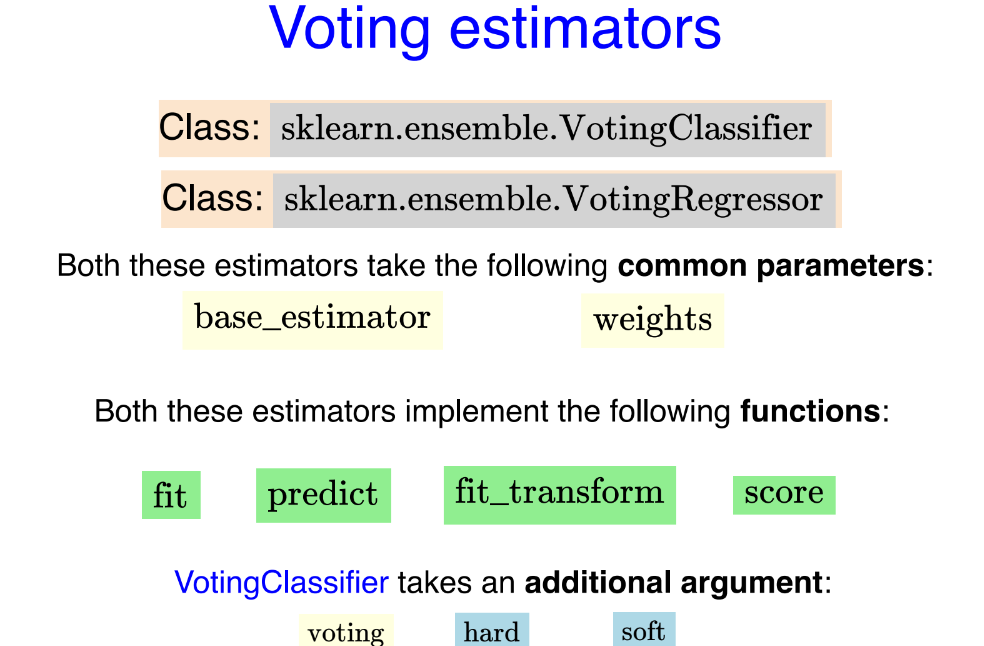

Install the following dependencies if you face issues while importing libraries

In [1]:
# pip install tensorflow keras

In [2]:
## Import basic libraries

# plotting utility
import matplotlib.pyplot as plt

# dataset loading through mnist.
from keras.datasets import mnist

# training three classifiers: decision tree, bagging and random forest.
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# model selection utilities for training and test split and cross validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

# use shuffle-split cross validation for this exercise.
from sklearn.model_selection import ShuffleSplit

# make use of confusion matrix and classification report to evaluate performance
# on the test set.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# the model is defined through pipeline utility.
from sklearn.pipeline import Pipeline

### Loading MNIST dataset

We begin by loading MNIST dataset with load_data function in mnist class.

We obtain:

- Training feature matrix and labels
- Test feature matrix and labels

In [3]:
# Load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

As you know there are 60000 examples in training set and 10000 examples in the test set.

Each example is a grey scale image of size 28x28. There are 10 different labels - one for each digit - 0 to 9.

In [4]:
print('Shape of training data',X_train.shape)
print('Shape of training labels', y_train.shape)
print('Shape of testing data', X_test.shape)
print('Shape of testing labels',y_test.shape)

Shape of training data (60000, 28, 28)
Shape of training labels (60000,)
Shape of testing data (10000, 28, 28)
Shape of testing labels (10000,)


Before using the dataset for training and evaluation, we need to flatten it into a vector. After flattening, we have training and test examples represented with a vector of 784 features. Each feature records pixel intensity in each of 28x28 pixel.

We normalize the pixel intensity by dividing it with the maximum value i.e. 255. In that sense we have each feature value in the range 0 to 1.

In [5]:
# Flatten each input image into a vector of length 784
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

# Normalizing.
X_train = X_train/255
X_test = X_test/255

print('Shape of training data after flattening',X_train.shape)
print('Shape of testing data after flattening', X_test.shape)

Shape of training data after flattening (60000, 784)
Shape of testing data after flattening (10000, 784)


We use ShuffleSplit cross validation with 10 splits and 20% data set aside for model evaluation as a test data.

In [6]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

We define two functions:

1. `train_classifiers` contains a common code for training classifiers for MNIST multiclass classification problem.
- It takes `estimator`, feature matrix, labels, cross validation strategy and name of the classifier as input.
- It first fits the estimator with feature matrix and labels.
- It obtains cross validated `f1_macro` score for training set with 10-fold ShuffleSplit cross validation and prints it.

In [8]:
def train_classifiers(estimator, X_train, y_train, cv, name):
  estimator.fit(X_train, y_train)
  cv_train_score = cross_val_score(estimator, X_train, y_train,
                                   cv=cv, scoring='f1_macro')
  print(f"On an average, {name} model has f1 score of {cv_train_score.mean():.3f} +/- {cv_train_score.std():.3f} on the training set.")

2. The `eval function` takes estimator, test feature matrix and labels as input and produce classification report and confuction matrix.
- It first predicts labels for the test set.
- Then it uses these predicted reports for calculating various evaluation metrics like precision, recall, f1 score and accuracy for each of the 10 classes.
- It also obtains a confusion matrix by comparing these predictions with the actual labels and displays it with ConfusionMatrixDisplay utility.

In [9]:
def eval(estimator, X_test, y_test):
  y_pred = estimator.predict(X_test)

  print("# Classification report")
  print(classification_report(y_test, y_pred))

  print("# Confusion matrix")
  disp = ConfusionMatrixDisplay(
      confusion_matrix=confusion_matrix(y_test, y_pred))
  disp.plot()
  plt.title('Confusion matrix')
  plt.show()

Let's train three classifiers with default parameters.

1. `Decision tree`
2. `Bagging classifier` - which uses decision tree as a default classifier and trains multiple decision tree classifiers on different bags obtained through bootstrap sampling of training set.
3. `Random forest classifier` - which is also a bagging technique, which trains different decision tree classifiers by randomly selecting attributes for splitting on bags of boostrap sample of training set.

### Decision trees for MNIST multiclass classification
We instantiate a decision tree classifier with default parameters and train it.
The `train_classifier` function prints mean of cross validated accuracy and standard deviation of the trained classifier on the training set.

In [11]:
decision_tree_pipeline = Pipeline([("classifier", DecisionTreeClassifier())])
train_classifiers(decision_tree_pipeline, X_train, y_train.ravel(), cv,
                  "decision tree")

On an average, decision tree model has f1 score of 0.867 +/- 0.004 on the training set.


Let's evaluate the trained classifier on the test set.

# Classification report
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       980
           1       0.95      0.96      0.96      1135
           2       0.87      0.86      0.86      1032
           3       0.83      0.85      0.84      1010
           4       0.86      0.87      0.87       982
           5       0.85      0.84      0.85       892
           6       0.89      0.89      0.89       958
           7       0.92      0.90      0.91      1028
           8       0.81      0.80      0.80       974
           9       0.86      0.85      0.85      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

# Confusion matrix


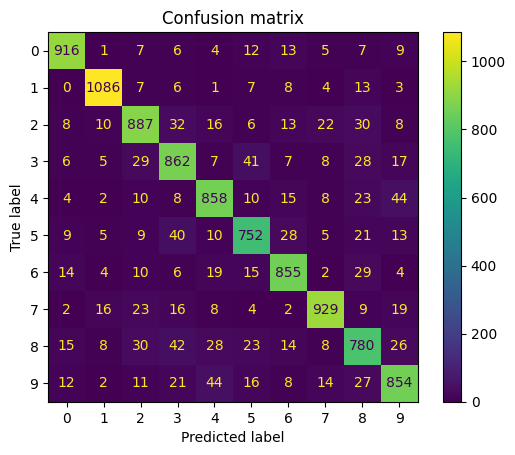

In [12]:
eval(decision_tree_pipeline, X_test, y_test)

## MNIST classification with Bagging

Let's instantiate a bagging classifier object with default parameters and train it.

Observe the mean f1_score and its standard deviation obtained by the classifier based 10-fold cross validation of the training set.

In [13]:
# bagging_pipeline = Pipeline([('scaler', MinMaxScaler()),
#                                    ("classifier", BaggingClassifier())])
bagging_pipeline = Pipeline([("classifier", BaggingClassifier())])
train_classifiers(bagging_pipeline, X_train, y_train.ravel(), cv,
                  "bagging")

On an average, bagging model has f1 score of 0.937 +/- 0.005 on the training set.


Let's evaluate the trained classifier on the test set.

# Classification report
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.97      0.99      0.98      1135
           2       0.93      0.93      0.93      1032
           3       0.93      0.93      0.93      1010
           4       0.93      0.95      0.94       982
           5       0.93      0.93      0.93       892
           6       0.96      0.95      0.96       958
           7       0.96      0.94      0.95      1028
           8       0.93      0.92      0.93       974
           9       0.95      0.92      0.94      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.95      0.94      0.94     10000

# Confusion matrix


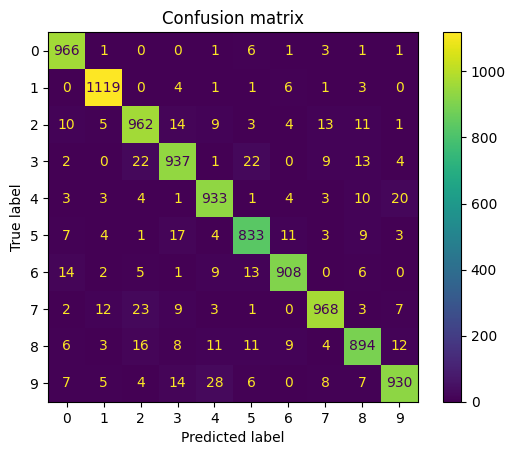

In [14]:
eval(bagging_pipeline, X_test, y_test)

## Random forest for MNIST multiclass classification
Let's instantiate a random forest classifier object with default parameters and train it.

Observe the mean f1_score and its standard deviation obtained by the classifier based 10-fold cross validation of the training set.

In [15]:
# random_forest_pipeline = Pipeline([('scaler', MinMaxScaler()),
#                                    ("classifier", RandomForestClassifier())])
random_forest_pipeline = Pipeline([("classifier", RandomForestClassifier())])
train_classifiers(random_forest_pipeline, X_train, y_train.ravel(), cv,
                  "random forest")

On an average, random forest model has f1 score of 0.967 +/- 0.001 on the training set.


Let's evaluate a random forest classifier on the test set and obtain classification report containing predicision, recall, f1-score and accuracy for each class. It also calculates confusion matrix and displays it with ConfusionMatrixDisplay utility.

# Classification report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.97      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.97      0.97       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

# Confusion matrix


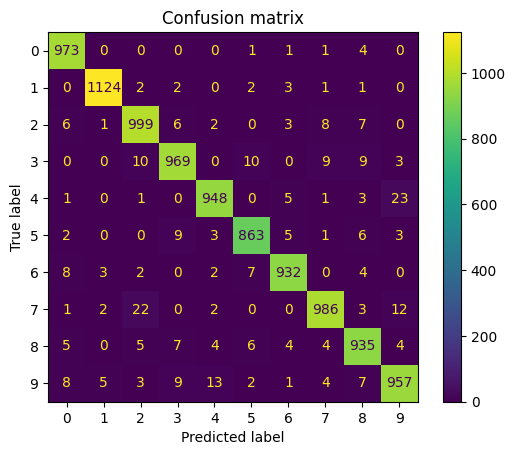

In [16]:
eval(random_forest_pipeline, X_test, y_test)

### Summary

- We trained three multi-class classifiers for handwritten digit recognition.

- The `decision tree classifier` is a baseline classifier, which obtained accuracy of 88% on the test set.

- Using `bagging` and training the same decision tree classifier gave us an increase of 6 percentage point in the accuracy, which translates to 94% accuracy on the test set.

- Finally `random forest` pushed that further to 97%.

We can see that how ensemble techniques give better results on the classification task compared to a single classifier.

With this demonstration, you have added three more powerful tools in your ML toolkit.

### Section 2

we will apply ensemble technqiues regression problem in california housing dataset.

We have already applied different regressors on california housing dataset. In this colab, we will make use of

1. Decision tree regressor
2. Bagging regressor
3. Random Forest regressor
   
We will observe performance improvement when we use random forest over decision trees and bagging, which also uses decision tree regressors.

In [17]:
import pandas as pd
import numpy as np

from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit

from sklearn.tree import DecisionTreeRegressor

In [18]:
np.random.seed(306)

Let's use ShuffleSplit as cv with 10 splits and 20% examples set aside as test examples.

In [19]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

Let's download the data and split it into training and test sets.

In [21]:
# fetch dataset
features, labels = fetch_california_housing(as_frame=True, return_X_y=True)
labels *= 100

# train-test split
com_train_features, test_features, com_train_labels, test_labels = train_test_split(
    features, labels, random_state=42)

# train --> train + dev split
train_features, dev_features, train_labels, dev_labels = train_test_split(
    com_train_features, com_train_labels, random_state=42)

### Training different regressors

Let's train different regressors:

In [22]:
def train_regressor(estimator, X_train, y_train, cv, name):
  cv_results = cross_validate(estimator,
                              X_train, 
                              y_train, 
                              cv=cv,
                              scoring="neg_mean_absolute_error",
                              return_train_score=True,
                              return_estimator=True)

  cv_train_error = -1* cv_results['train_score']
  cv_test_error = -1 * cv_results['test_score']

  print(f"On an average, {name} makes an error of "
        f"{cv_train_error.mean():.3f}k +/- {cv_train_error.std():.3f}k on the training set.")
  print(f"On an average, {name} makes an error of "
        f"{cv_test_error.mean():.3f}k +/- {cv_test_error.std():.3f}k on the test set.")

### Decission Tree Regressor

In [23]:
#@title Decission Tree Regressor
train_regressor(
    DecisionTreeRegressor(), com_train_features,
    com_train_labels, cv, 'decision tree regressor')

On an average, decision tree regressor makes an error of 0.000k +/- 0.000k on the training set.
On an average, decision tree regressor makes an error of 47.259k +/- 1.142k on the test set.


### Bagging Regressor

In [24]:
#@title Bagging Regressor
train_regressor(
    BaggingRegressor(), com_train_features, com_train_labels, cv,
   'bagging regressor')

On an average, bagging regressor makes an error of 14.377k +/- 0.196k on the training set.
On an average, bagging regressor makes an error of 35.217k +/- 0.608k on the test set.


### RandomForest regressor

In [25]:
#@title Random Forest Regressor
train_regressor(
    RandomForestRegressor(), com_train_features, com_train_labels, cv,
    'random forest regressor')

On an average, random forest regressor makes an error of 12.642k +/- 0.071k on the training set.
On an average, random forest regressor makes an error of 33.198k +/- 0.717k on the test set.


#### Parameter search for random forest regressor

In [26]:
param_distributions = {
    "n_estimators": [1, 2, 5, 10, 20, 50, 100, 200, 500],
    "max_leaf_nodes": [2, 5, 10, 20, 50, 100],
}
search_cv = RandomizedSearchCV(
    RandomForestRegressor(n_jobs=2), param_distributions=param_distributions,
    scoring="neg_mean_absolute_error", n_iter=10, random_state=0, n_jobs=2,
)

In [27]:
search_cv.fit(com_train_features, com_train_labels)

RandomizedSearchCV(estimator=RandomForestRegressor(n_jobs=2), n_jobs=2,
                   param_distributions={'max_leaf_nodes': [2, 5, 10, 20, 50,
                                                           100],
                                        'n_estimators': [1, 2, 5, 10, 20, 50,
                                                         100, 200, 500]},
                   random_state=0, scoring='neg_mean_absolute_error')

In [28]:
columns = [f"param_{name}" for name in param_distributions.keys()]
columns += ["mean_test_error", "std_test_error"]
cv_results = pd.DataFrame(search_cv.cv_results_)

In [29]:
cv_results["mean_test_error"] = -cv_results["mean_test_score"]
cv_results["std_test_error"] = cv_results["std_test_score"]
cv_results[columns].sort_values(by="mean_test_error")

,param_n_estimators,param_max_leaf_nodes,mean_test_error,std_test_error
0,500,100,40.643568,0.719655
2,10,100,41.558963,0.870949
7,100,50,43.779609,0.814176
8,1,100,46.477329,2.275749
6,50,20,49.451237,1.042817
1,100,20,49.452043,1.061062
9,10,20,50.067832,0.962411
3,500,10,55.045884,1.077330
4,5,5,61.652115,1.138570
5,5,2,73.163385,1.169139


In [30]:
error = -search_cv.score(test_features, test_labels)
print(f"On average, our random forest regressor makes an error of {error:.2f} k$")

On average, our random forest regressor makes an error of 40.46 k$
